# Credit Card Fraud Detection

Many banks use Machine Learning to detect frauds in credit card transactions, but how does it work? Let's have a look at it 🧐

Copyright (c) 2020 Kunal Gehlot

You can find the original repository [here](https://github.com/KunalGehlot/Credit-Card-Fraud-Detection)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

In [2]:
df = pd.read_csv('../data/creditcard.csv')

## Data Analysis

In [3]:
display(df.head())
print('-' * 175)
display(df.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
display(df.info())
print('-' * 50)
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None

--------------------------------------------------


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


We can see that average transaction amount is of $88.35.

But if we take a closer look

In [5]:
f = df[df['Class'] == 1]
v = df[df['Class'] == 0]

f['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

We find out that Fraudulent transaction are on an average of $122, much higher than average global transactions.

---------------------------------------------
|  No Fraud Percentage:	 99.82725143693798 %  |
---------------------------------------------
|  Fraud Percentage:	 0.1727485630620034 % |
---------------------------------------------


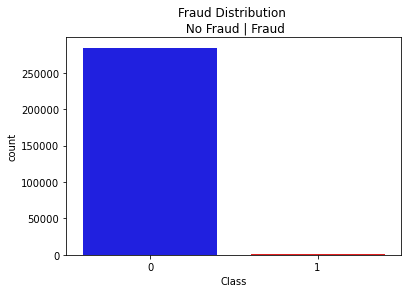

In [6]:
print('-'*45)
print("|  No Fraud Percentage:\t", df['Class'].value_counts()[0]/len(df)*100, "%  |")
print('-'*45)
print("|  Fraud Percentage:\t", df['Class'].value_counts()[1]/len(df)*100, "% |")
print('-'*45)

colors = ["#0000ff", "#ff0000"]
plt.title('Fraud Distribution \n No Fraud | Fraud')
sns.countplot('Class', data=df, palette=colors)

If we use this Dataset as is, our algorithms will probably overfit since it will "assume" that most of the transactions are not fraud.

### Distribution of Amount and Time
To check the skewness of the data to better understand. 


(0.0, 172792.0)

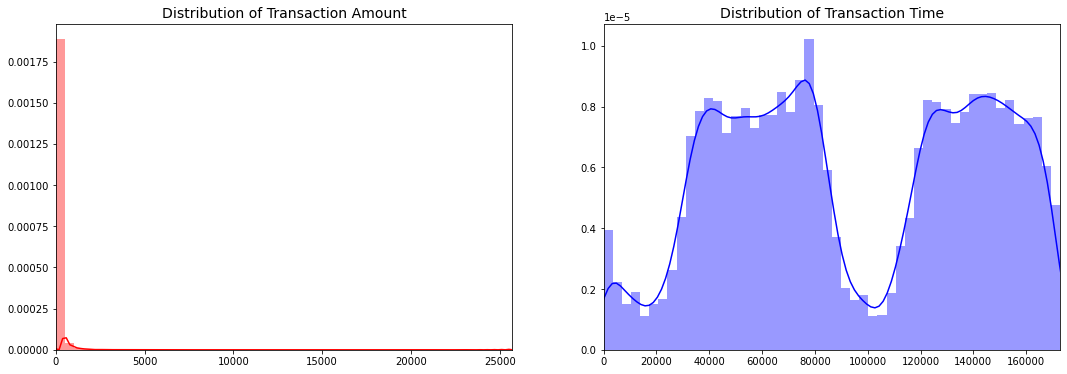

In [7]:
fig, ax = plt.subplots(1,2, figsize=(18,6))

amount = df['Amount'].values
time = df['Time'].values

sns.distplot(amount, ax = ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize = 14)
ax[0].set_xlim([min(amount), max(amount)])

sns.distplot(time, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize = 14)
ax[1].set_xlim([min(time), max(time)])

### Distribution Plot of each feature
Plotting histograms with their distribution of each feature (Time + V1-V27) to see the difference between Fraudulent and Non-Fraudulent transactions.

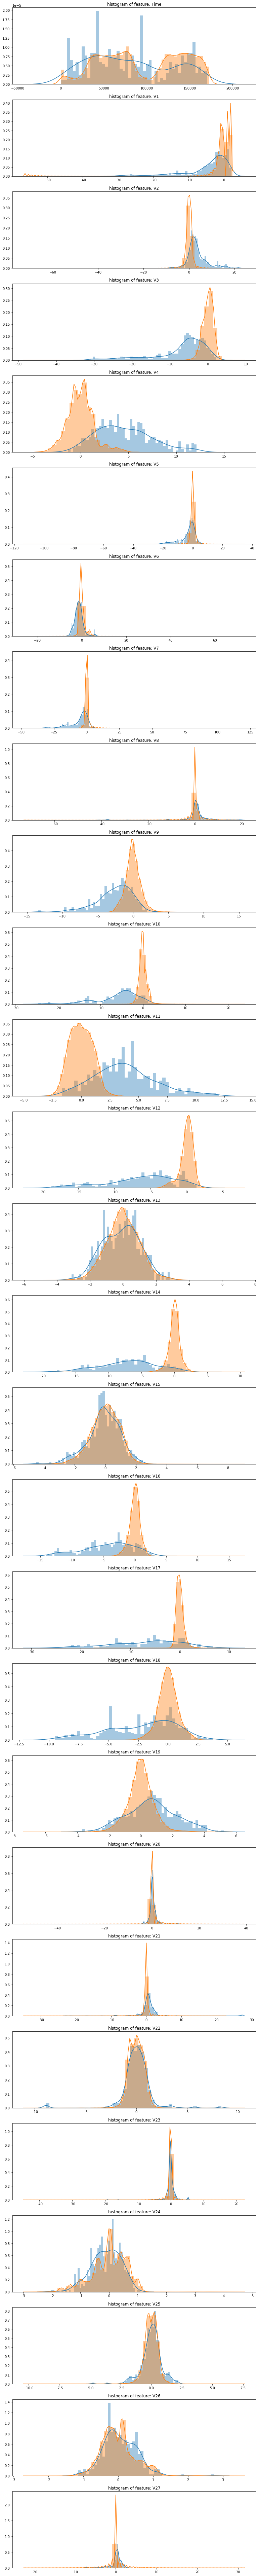

In [8]:
features = df.iloc[:, 0:28].columns

plt.figure(figsize=(13, 28*5))
gspec = gridspec.GridSpec(28,1)

for i, c in enumerate(df[features]):
    ax = plt.subplot(gspec[i])
    sns.distplot(df[c][df.Class == 1], bins = 50)
    sns.distplot(df[c][df.Class == 0], bins = 50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: '+str(c))

plt.show()

The features like V4, V5, V8, V10, V11, V12, V13, V15, V17, V18, V19 have noticeable differences which can help us find the fraudulent transactions.

### Correlation Matrix

Making a Correlation Matrix can help identify the relationship between the features of the data and if they can be used to deduce a relation to create decisions.

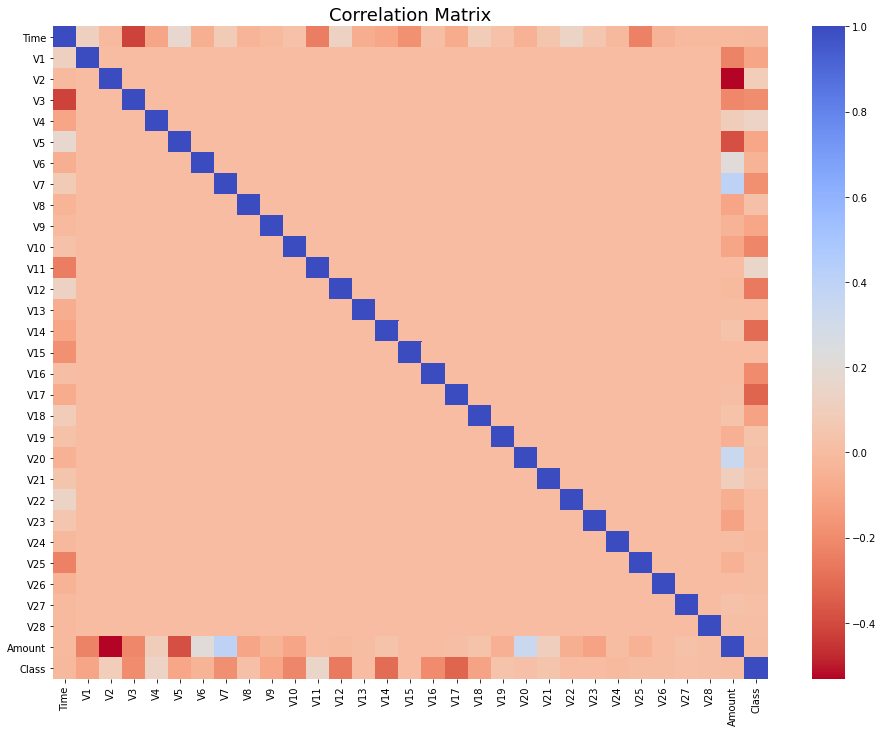

In [9]:
corr = df.corr()
plt.figure(figsize = (16,12))

sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title("Correlation Matrix", fontsize=18)

plt.show()

Most of the features do not look like related at all, which is not good as it will cause our model to work as expected and cause it to overfit. 

## Scaling and Balancing the Data

In [10]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

scaled_amount = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
scaled_time = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

df.drop(['Time', 'Amount'], axis = 1, inplace = True)
df.insert(0, 'scaled_amt', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

display(df.head())

,scaled_amt,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Splitting Data

Sincle we will be using sampling on the dataset, we need to split the data for testing purposes. As we need to test the model on the original dataset and not the sampled data.

In [11]:
X = df.drop('Class', axis = 1)
y = df['Class']

sss = StratifiedShuffleSplit(n_splits = 5, random_state = None)

for trainIN, testIN in sss.split(X, y):
    print("Train: ", trainIN, "\nTest: ", testIN, "\n\n")
    og_Xtrain, og_Xtest = X.iloc[trainIN], X.iloc[testIN]
    og_ytrain, og_ytest = y.iloc[trainIN], y.iloc[testIN]
    
og_Xtrain = og_Xtrain.values
og_Xtest = og_Xtest.values
og_ytrain = og_ytrain.values
og_ytest = og_ytest.values

train_unique_label, train_counts_label = np.unique(og_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(og_ytest, return_counts=True)

print('-' * 75)

print('Label Distributions: \n')
print(train_counts_label/ len(og_ytrain))
print(test_counts_label/ len(og_ytest))

Train:  [ 50328  18476 203082 ... 251112 154064  55330] 
Test:  [169235 273497  40730 ...  46922 164884 157578] 


Train:  [135478  62062 163776 ...   7750  59907  37955] 
Test:  [171431 273378 265523 ... 237285 224840  77181] 


Train:  [ 18614 159157  67085 ... 213873 144124  91887] 
Test:  [266420 133479  76033 ...  61876 217055 243306] 


Train:  [151586  53233 266486 ... 198196 242056  33067] 
Test:  [ 35875   9647 228305 ... 216727  27683 141562] 


Train:  [258322  47400 129955 ... 258349 202137 211582] 
Test:  [ 15010 227247 103118 ... 131559  68785 258853] 


---------------------------------------------------------------------------
Label Distributions: 

[0.99827173 0.00172827]
[0.99827955 0.00172045]


### Random Under-Sampling

To balance the data, we'll concatenate the data to 492 cases of Non-Fradulent transactions so that we have equal amount of Fradulent and Non-Fradulent transactions.

In [12]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac = 1, random_state= 42)

new_df.head()

,scaled_amt,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
148500,-0.223573,0.062043,1.940393,-0.258680,-0.686034,1.656241,-0.346698,-0.305426,-0.221072,0.076669,...,-0.435658,-0.346331,-0.742501,0.342865,1.051608,-0.045796,-0.870455,0.020400,-0.037526,0
122479,2.763921,-0.095361,-5.622469,3.480623,-6.200677,4.311234,-5.226286,-1.341764,-5.220941,2.682844,...,-0.156289,0.949569,-0.428986,-0.350676,0.197550,0.159234,-0.377791,-0.213562,0.459529,1
182224,-0.118773,0.477203,-2.596575,0.339598,-1.308397,-0.912384,2.394275,-0.197739,0.360675,0.908040,...,-0.313980,0.374110,0.949575,-1.178340,-1.458914,1.237362,1.255431,0.033097,-0.459303,0
31002,1.253406,-0.570049,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,...,0.299489,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,1
6971,24.979809,-0.888497,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,...,-3.042626,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1


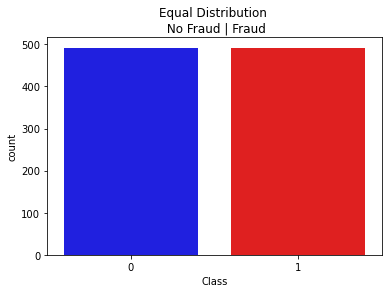

In [17]:
sns.countplot('Class', data = new_df, palette=colors)
plt.title('Equal Distribution \n No Fraud | Fraud')
plt.show()

### New Correlation Matrix

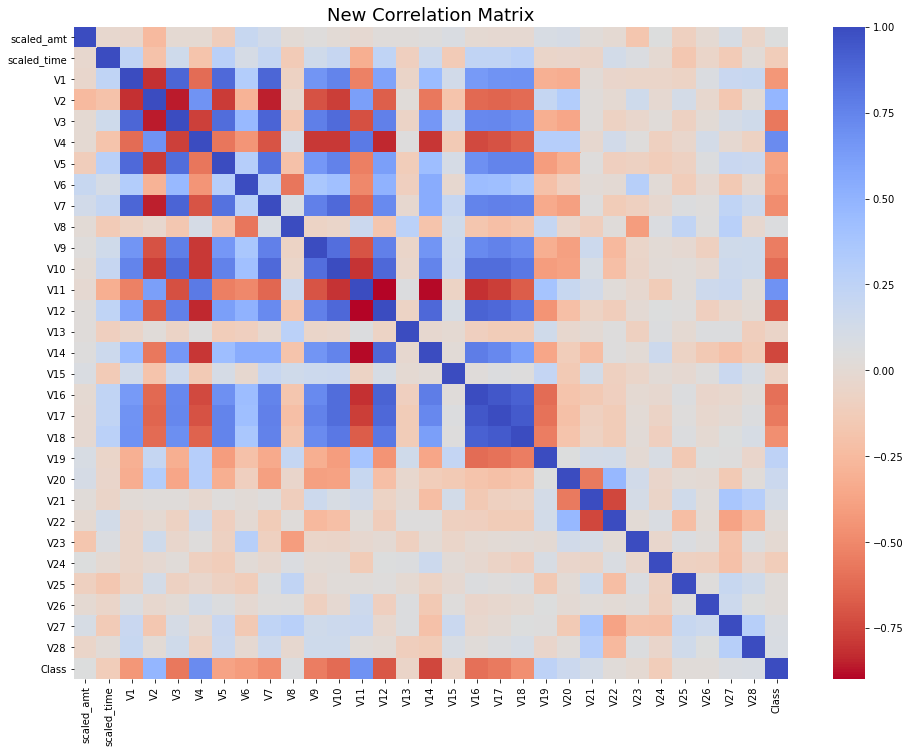

In [14]:
corr = new_df.corr()
plt.figure(figsize = (16,12))

sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title("New Correlation Matrix", fontsize=18)

plt.show()

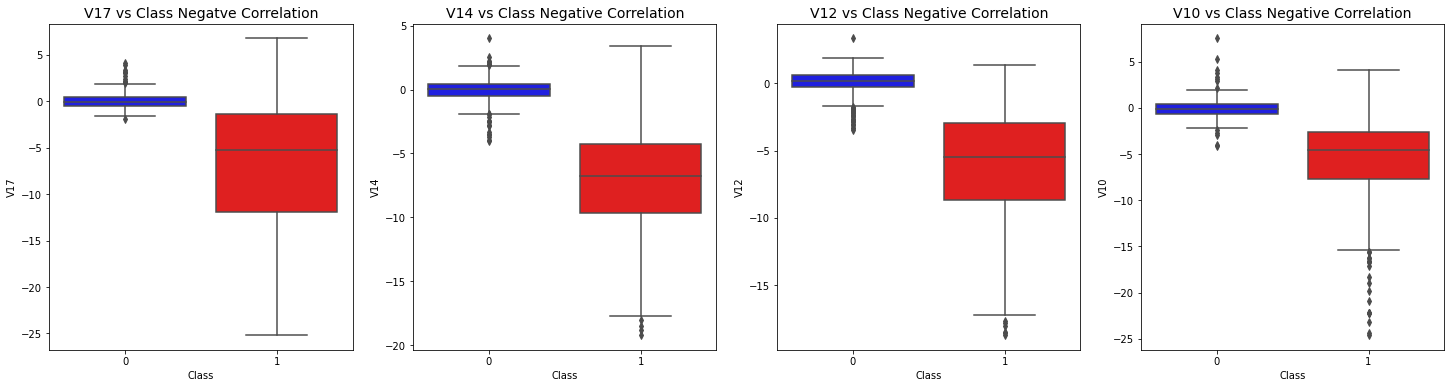

In [15]:
f ,axes = plt.subplots(ncols = 4, figsize = (25, 6))

sns.boxplot(x = 'Class', y='V17', data = new_df, palette = colors, ax = axes[0])
axes[0].set_title('V17 vs Class Negatve Correlation', fontsize = 14)

sns.boxplot(x = 'Class', y = 'V14', data= new_df, palette= colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation', fontsize = 14)

sns.boxplot(x = 'Class', y = 'V12', data= new_df, palette= colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation', fontsize = 14)

sns.boxplot(x = 'Class', y = 'V10', data= new_df, palette= colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation', fontsize = 14)

plt.show()

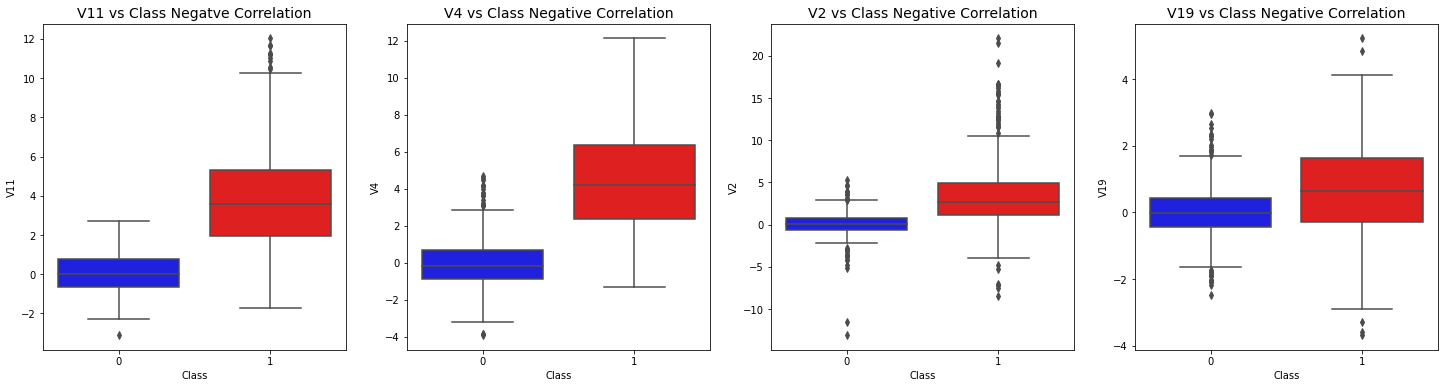

In [16]:
f ,axes = plt.subplots(ncols = 4, figsize = (25, 6))

sns.boxplot(x = 'Class', y='V11', data = new_df, palette = colors, ax = axes[0])
axes[0].set_title('V11 vs Class Negatve Correlation', fontsize = 14)

sns.boxplot(x = 'Class', y = 'V4', data= new_df, palette= colors, ax=axes[1])
axes[1].set_title('V4 vs Class Negative Correlation', fontsize = 14)

sns.boxplot(x = 'Class', y = 'V2', data= new_df, palette= colors, ax=axes[2])
axes[2].set_title('V2 vs Class Negative Correlation', fontsize = 14)

sns.boxplot(x = 'Class', y = 'V19', data= new_df, palette= colors, ax=axes[3])
axes[3].set_title('V19 vs Class Negative Correlation', fontsize = 14)

plt.show()